In [1]:
from empiricaldist import Pmf
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

## Exercise 1

Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room.

You think there are fewer then 1200 people, and you offer to prove it. It would take too long to count, so you try an experiment:
 - You ask how many people were born on May 11 and two people raise their hands.
 - You ask how many were born on May 23 and 1 person raises their hand.
 - Finally, you ask how many were born on August 1, and no one raises their hand.

How many people are in the audience? What is the probability that there are more than 1200 people. Hint: Remember the binomial distribution.

### Assumptions

 - Assume all birthdates are equally likely
 - Assume everyone in the audience responds (truthfully)
 - Ignore non-independence (someone born on May 1st cannot also be born May 2nd)

In [2]:
p = 1/365

data = {
    "May 11": 2,
    "May 23": 1,
    "August 1": 0,
}

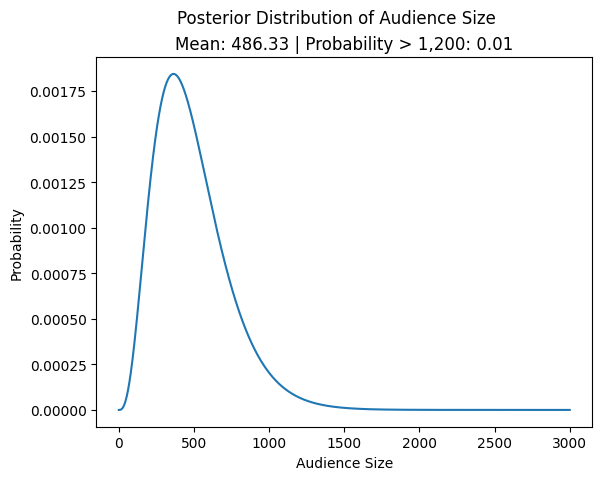

In [3]:
hypos = np.arange(1, 3_000)
prior = Pmf.from_seq(hypos)

posterior = prior.copy()
for date, count in data.items():
    posterior *= binom.pmf(count, hypos, p)
posterior.normalize()
posterior.plot()
plt.suptitle("Posterior Distribution of Audience Size")
plt.title(f"Mean: {posterior.mean():.2f} | Probability > 1,200: {posterior.prob_gt(1_200):.2f}")
plt.xlabel("Audience Size")
plt.ylabel("Probability");

# Exercise 2
I often see rabbits in the garden behind my house, but it’s not easy to tell them apart, so I don’t really know how many there are.

Suppose I deploy a motion-sensing camera trap that takes a picture of the first rabbit it sees each day. After three days, I compare the pictures and conclude that two of them are the same rabbit and the other is different.

How many rabbits visit my garden?

To answer this question, we have to think about the prior distribution and the likelihood of the data:
 - I have sometimes seen four rabbits at the same time, so I know there are at least that many. I would be surprised if there were more than 10. So, at least as a starting place, I think a uniform prior from 4 to 10 is reasonable.
 - To keep things simple, let’s assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day. Let’s also assume it is guaranteed that the camera trap gets a picture every day.


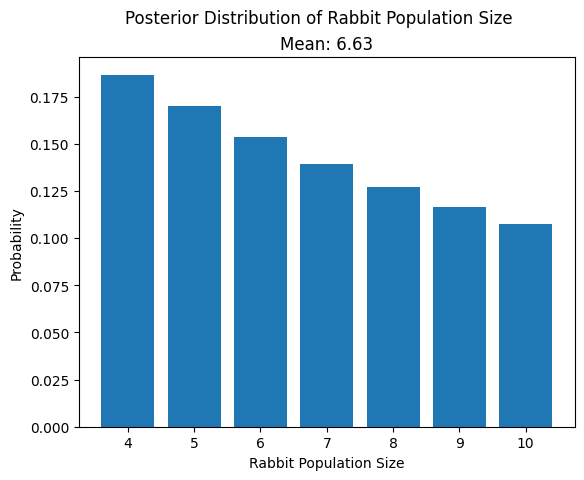

In [4]:
hypos = np.arange(4, 11)
prior = Pmf.from_seq(hypos)

data = [
    "Rabbit named Wesley",
    "Rabbit named Wesley",
    "Rabbit named Annie",    
]
posterior = prior.copy()
seen_rabbits = []
for rabbit in data:
    if rabbit in seen_rabbits:
        posterior *= 1 / hypos # probability of seeing a rabbit you've already seen
    else:
        posterior *= (hypos-1) / hypos # probability of seeing a new rabbit
        seen_rabbits.append(rabbit)

posterior.normalize()
posterior.bar()
plt.suptitle("Posterior Distribution of Rabbit Population Size")
plt.title(f"Mean: {posterior.mean():.2f}")
plt.xlabel("Rabbit Population Size")
plt.ylabel("Probability");

# Excercise 3

Suppose that in the criminal justice system, all prison sentences are either 1, 2, or 3 years, with an equal number of each. One day, you visit a prison and choose a prisoner at random. What is the probability that they are serving a 3-year sentence? What is the average remaining sentence of the prisoners you observe?

In [5]:
hypos = np.arange(1, 4)
prior = Pmf.from_seq(hypos)
likelihood = [1, 2, 3]
posterior = prior * likelihood
posterior.normalize()
display(posterior)
print(f"Mean: {posterior.mean() / 2:.2f}")

,probs
1,0.166667
2,0.333333
3,0.500000


Mean: 1.17


# Exercise 4

If I chose a random adult in the U.S., what is the probability that they have a sibling? To be precise, what is the probability that their mother has had at least one other child.

This article from the Pew Research Center provides some relevant data.

From it, I extracted the following distribution of family size for mothers in the U.S. who were 40-44 years old in 2014:

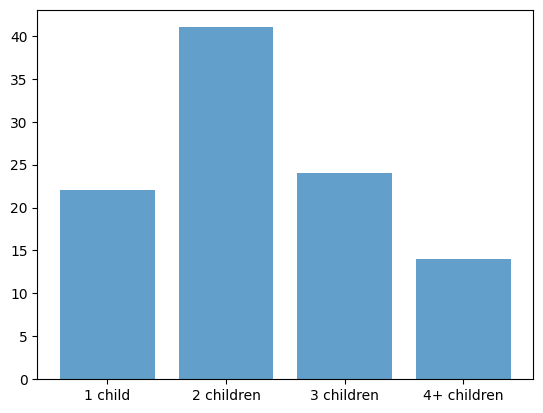

In [7]:
quantities = [1, 2, 3, 4]
probabilities = [22, 41, 24, 14]

prior = Pmf(data=probabilities, index=quantities)
prior.bar(alpha=0.7)
plt.xticks(quantities, ['1 child', '2 children', '3 children', '4+ children']);

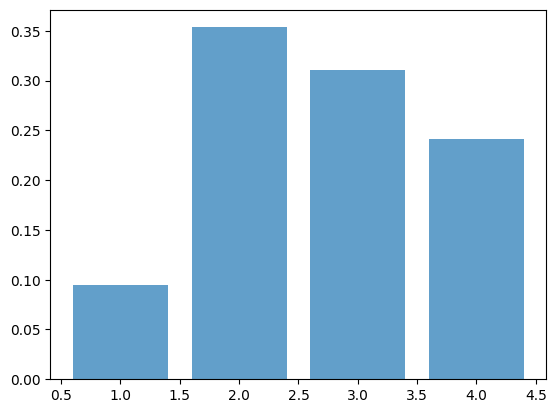

In [8]:
likelihood = quantities
posterior = prior * likelihood
posterior.normalize()
posterior.bar(alpha=0.7)